# Sprintup Project - 2. Dimensionality Reduction - PCA (Principal Component Analysis)

In [1]:
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
%%capture
%run "./01_data_preprocessing.ipynb"

In [3]:
# Initialize PCA
pca = PCA()
X_pca = pca.fit_transform(X_encoded_scaled)
# Create a DataFrame for the PCA components (optional, for viewing)
pca_columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]
df_pca = pd.DataFrame(X_pca, columns=pca_columns, index=X_encoded_scaled.index)
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
0,0.743395,0.241655,1.228097,-0.194848,-0.312155,1.227904,0.180529,-0.273525,0.415554,-1.059261,-0.105996,0.319543,0.386970,0.801648,0.818205,-0.020181,-0.410558,-0.040864
1,3.377716,0.586399,-0.268608,-0.634395,0.558509,-1.316725,-0.450809,-0.406612,0.224524,-0.137938,0.029747,0.466263,0.294675,-0.495484,-0.232978,0.295731,0.057445,-0.018946
2,2.229519,-1.158396,-0.651844,-0.056997,0.675065,0.337101,0.719388,0.075691,0.417784,0.206917,0.105479,0.127306,-0.270053,-0.214015,-0.068736,-0.025331,0.027814,-0.010626
3,-1.378342,-0.413227,1.573942,2.533113,0.169787,1.164195,-0.623955,0.277573,-0.225240,-0.308339,-0.382545,0.170076,0.421759,-0.176946,0.244573,0.482101,0.124658,-0.064843
4,-1.792393,-0.343773,0.981953,0.596809,0.113513,0.132955,-0.278152,-0.996547,0.147372,-0.309863,0.391881,-0.196826,-0.707969,-0.063932,-0.084326,-0.229270,0.054226,-0.006359



Explained variance ratio for each component:
PC1: 0.2744
PC2: 0.1482
PC3: 0.1148
PC4: 0.1021
PC5: 0.0860
PC6: 0.0602
PC7: 0.0407
PC8: 0.0315
PC9: 0.0303
PC10: 0.0267
PC11: 0.0230
PC12: 0.0173
PC13: 0.0163
PC14: 0.0138
PC15: 0.0058
PC16: 0.0045
PC17: 0.0027
PC18: 0.0015

Cumulative explained variance:
Up to PC1: 0.2744
Up to PC2: 0.4226
Up to PC3: 0.5374
Up to PC4: 0.6395
Up to PC5: 0.7255
Up to PC6: 0.7857
Up to PC7: 0.8264
Up to PC8: 0.8579
Up to PC9: 0.8882
Up to PC10: 0.9150
Up to PC11: 0.9379
Up to PC12: 0.9553
Up to PC13: 0.9716
Up to PC14: 0.9854
Up to PC15: 0.9912
Up to PC16: 0.9957
Up to PC17: 0.9985
Up to PC18: 1.0000

Number of components to explain 95% variance: 12


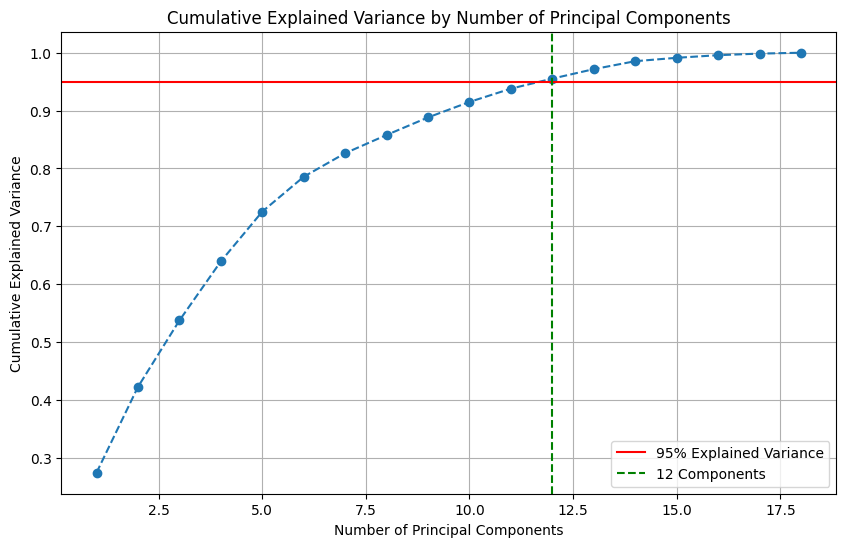

In [4]:
# Analyze explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_
print("\nExplained variance ratio for each component:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:.4f}")

# Calculate cumulative explained variance to understand total variance captured
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
print("\nCumulative explained variance:")
for i, cum_ratio in enumerate(cumulative_explained_variance):
    print(f"Up to PC{i+1}: {cum_ratio:.4f}")

# Determine optimal number of components to explain 95% of variance
n_components_95_var = np.where(cumulative_explained_variance >= 0.95)[0][0] + 1
print(f"\nNumber of components to explain 95% variance: {n_components_95_var}")

# Visualize the cumulative explained variance with markers for decision making
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Explained Variance')
plt.axvline(x=n_components_95_var, color='g', linestyle='--', label=f'{n_components_95_var} Components')
plt.legend()
plt.show()

In [5]:
# Apply final PCA transformation with optimal number of components
num_of_components = n_components_95_var  

pca_final = PCA(num_of_components)
X_pca_final = pca_final.fit_transform(X_encoded_scaled)

# Create final PCA-transformed DataFrame with reduced dimensionality
pca_final_columns = [f'PC{i+1}' for i in range(X_pca_final.shape[1])]
df_pca_transformed = pd.DataFrame(X_pca_final, columns=pca_final_columns, index=X_encoded_scaled.index)

# Add the target variable back to the transformed dataset for modeling
y_target = df_s_e['num']
df_pca_transformed_with_target = pd.concat([df_pca_transformed, y_target], axis=1)
# Display the final PCA-transformed dataset with reduced features
print(f"\nFinal PCA-transformed dataset with {num_of_components} components:")
df_pca_transformed_with_target.head()


Final PCA-transformed dataset with 12 components:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,num
0,0.743395,0.241655,1.228097,-0.194848,-0.312155,1.227904,0.180529,-0.273525,0.415554,-1.059261,-0.105996,0.319543,0
1,3.377716,0.586399,-0.268608,-0.634395,0.558509,-1.316725,-0.450809,-0.406612,0.224524,-0.137938,0.029747,0.466263,2
2,2.229519,-1.158396,-0.651844,-0.056997,0.675065,0.337101,0.719388,0.075691,0.417784,0.206917,0.105479,0.127306,1
3,-1.378342,-0.413227,1.573942,2.533113,0.169787,1.164195,-0.623955,0.277573,-0.225240,-0.308339,-0.382545,0.170076,0
4,-1.792393,-0.343773,0.981953,0.596809,0.113513,0.132955,-0.278152,-0.996547,0.147372,-0.309863,0.391881,-0.196826,0


# Now we have a ️PCA-transformed dataset